<img src="./images/topbanner.jpg" style="margin: 1px; length: 800px">
by Terence Ong



### Background information

<b>
Problem Statement:
</b>
Costs of getting a service personnel onboard the drilling rig are extremely high as they are paid on a day rate. At the current moment, their services are engaged on 6 monthly basis. If we are able to better predict when would an equipment breakdown, we can then better plan for the service personnel to come onboard only when there is a need.   



### Preparing the Data


In [71]:
# Declarations

import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [72]:
# Read in the data.
path ='./data/equipmentbreakdown.csv'

equip = pd.read_csv(path, encoding = "ISO-8859-1")

In [73]:
equip.head()

,REG_DATE,ERR_DESCR,WORK_DESCR_LO,PERFORMED_ACTION_LO,RIG,AGE_OF_RIG,PERFORMED_ACTION_ID,PERFORMED_ACTION,ERR_TYPE,ERROR_TYPE,MCH_CODE,MCH_CODE_DESCRIPTION,SFI
0,13-Jul-15,Assistance to Fanø crane service.,na,Assist Fanø crane service.,J105,5361.0,12.0,Other,6.2,Other,11002484,CRANE NO.2; FWD;STBD,361
1,07-Jun-15,replace cables and plugs for test equip in mudlab,replace cables and plugs for test equip in mudlab,cables damaged,J105,5361.0,1.0,Replace,4.3,No power/voltage,12010582,THIRD PARTY EQUIPMENT - GROUP,180
2,08-Jun-15,Modifi bit braker,Modifi bit braker to fit new bit from Conoco,Modifi bit breaker to fit new bit from Conoco,J105,5361.0,1.0,Replace,1.0,General,10001235,"BIT SUB; 7 5/8"" REG BOX X BOX",353
3,10-Nov-15,Assist Archer with electrical connections etc.,Hook up test repair,Assist 3rd party,J105,5361.0,7.0,Service,6.0,General,12010588,OFFICE CONTAINER,180
4,09-Jan-16,Hook up MWD container,Hook up MWD container,Hook up MWD container,J105,5361.0,12.0,Other,6.0,General,12010582,THIRD PARTY EQUIPMENT - GROUP,180


<div class="alert alert-success" role="alert">

  1. Finding the frequency of breakdowns of each equipment
</div>


In [74]:
# Adding a new column to see the frequency of breakdown for each unique equipment

equip['Count_of_breakdown'] = equip.groupby('MCH_CODE')['MCH_CODE'].transform('count')

In [75]:
equip.head()

,REG_DATE,ERR_DESCR,WORK_DESCR_LO,PERFORMED_ACTION_LO,RIG,AGE_OF_RIG,PERFORMED_ACTION_ID,PERFORMED_ACTION,ERR_TYPE,ERROR_TYPE,MCH_CODE,MCH_CODE_DESCRIPTION,SFI,Count_of_breakdown
0,13-Jul-15,Assistance to Fanø crane service.,na,Assist Fanø crane service.,J105,5361.0,12.0,Other,6.2,Other,11002484,CRANE NO.2; FWD;STBD,361,42
1,07-Jun-15,replace cables and plugs for test equip in mudlab,replace cables and plugs for test equip in mudlab,cables damaged,J105,5361.0,1.0,Replace,4.3,No power/voltage,12010582,THIRD PARTY EQUIPMENT - GROUP,180,43
2,08-Jun-15,Modifi bit braker,Modifi bit braker to fit new bit from Conoco,Modifi bit breaker to fit new bit from Conoco,J105,5361.0,1.0,Replace,1.0,General,10001235,"BIT SUB; 7 5/8"" REG BOX X BOX",353,1
3,10-Nov-15,Assist Archer with electrical connections etc.,Hook up test repair,Assist 3rd party,J105,5361.0,7.0,Service,6.0,General,12010588,OFFICE CONTAINER,180,1
4,09-Jan-16,Hook up MWD container,Hook up MWD container,Hook up MWD container,J105,5361.0,12.0,Other,6.0,General,12010582,THIRD PARTY EQUIPMENT - GROUP,180,43


In [76]:
X = equip.drop('Count_of_breakdown', axis=1)
y = pd.DataFrame(equip.Count_of_breakdown)

In [77]:
X.shape

(40208, 13)

In [78]:
y.shape

(40208, 1)

In [79]:
X.index

RangeIndex(start=0, stop=40208, step=1)

In [80]:
X.isnull().sum()

REG_DATE                   0
ERR_DESCR                  0
WORK_DESCR_LO           1848
PERFORMED_ACTION_LO     3005
RIG                        2
AGE_OF_RIG                19
PERFORMED_ACTION_ID     3989
PERFORMED_ACTION        3250
ERR_TYPE                3973
ERROR_TYPE              3236
MCH_CODE                   0
MCH_CODE_DESCRIPTION      17
SFI                        0
dtype: int64

In [81]:
X.dtypes

REG_DATE                 object
ERR_DESCR                object
WORK_DESCR_LO            object
PERFORMED_ACTION_LO      object
RIG                      object
AGE_OF_RIG              float64
PERFORMED_ACTION_ID     float64
PERFORMED_ACTION         object
ERR_TYPE                float64
ERROR_TYPE               object
MCH_CODE                  int64
MCH_CODE_DESCRIPTION     object
SFI                       int64
dtype: object

In [82]:
X.describe(include="all")

,REG_DATE,ERR_DESCR,WORK_DESCR_LO,PERFORMED_ACTION_LO,RIG,AGE_OF_RIG,PERFORMED_ACTION_ID,PERFORMED_ACTION,ERR_TYPE,ERROR_TYPE,MCH_CODE,MCH_CODE_DESCRIPTION,SFI
count,40208,40208,38360,37203,40206,40189.000000,36219.000000,36958,36235.000000,36972,4.020800e+04,40191,40208.000000
unique,1382,37480,32305,32614,25,NaN,NaN,12,NaN,33,NaN,17740,NaN
top,05-Dec-16,Replace hose,.,.,J105,NaN,NaN,Replace,NaN,General,NaN,TOP DRIVE AND RETRACTABLE DOLLY,NaN
freq,200,55,509,560,4444,NaN,NaN,19532,NaN,12735,NaN,127,NaN
mean,NaN,NaN,NaN,NaN,NaN,3385.014755,3.613573,NaN,2.807341,NaN,1.142945e+07,NaN,484.528775
std,NaN,NaN,NaN,NaN,NaN,2598.321812,3.977835,NaN,1.894222,NaN,4.177843e+06,NaN,194.150358
min,NaN,NaN,NaN,NaN,NaN,825.000000,1.000000,NaN,1.000000,NaN,1.000124e+07,NaN,112.000000
25%,NaN,NaN,NaN,NaN,NaN,1435.000000,1.000000,NaN,1.100000,NaN,1.061617e+07,NaN,331.000000
50%,NaN,NaN,NaN,NaN,NaN,3169.000000,1.000000,NaN,2.400000,NaN,1.122080e+07,NaN,384.000000
75%,NaN,NaN,NaN,NaN,NaN,5117.000000,6.000000,NaN,4.000000,NaN,1.180429e+07,NaN,583.000000


In [83]:
#unique
X.apply(pd.Series.nunique)

REG_DATE                 1382
ERR_DESCR               37480
WORK_DESCR_LO           32305
PERFORMED_ACTION_LO     32614
RIG                        25
AGE_OF_RIG                 19
PERFORMED_ACTION_ID        11
PERFORMED_ACTION           12
ERR_TYPE                   37
ERROR_TYPE                 33
MCH_CODE                22612
MCH_CODE_DESCRIPTION    17740
SFI                       250
dtype: int64

<div class="alert alert-success" role="alert">

  <p>2. Proving that the older the equipment, higher chance of it breaking down. I used age_of_rig instead of the actual age of equipment as I don't have the data of when the equipment was purchased.</p>
  <hr>
  <p class="mb-0">A better way would be to look at the usage intensity of the equipment but I was unable to obtain those data. </p>
</div>



Text(10.05,0.5,'Breakdown frequency')

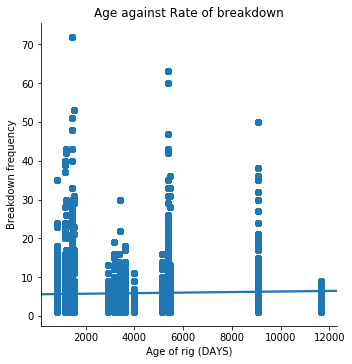

In [84]:
sns.lmplot(x='AGE_OF_RIG', y='Count_of_breakdown', data=equip);

plt.title('Age against Rate of breakdown')
plt.xlabel('Age of rig (DAYS)')
plt.ylabel('Breakdown frequency')


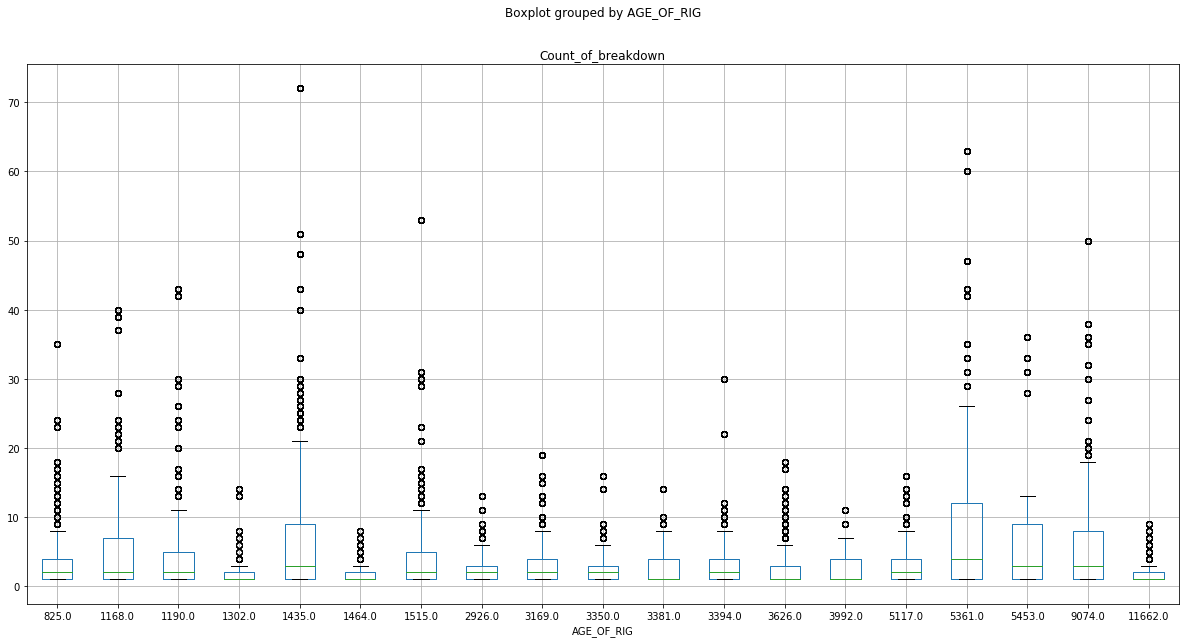

In [85]:
fig, ax = plt.subplots(figsize=(20,  10))
equip.boxplot(['Count_of_breakdown'], 'AGE_OF_RIG', ax);

<div class="alert alert-success" role="alert">
Proves the point that age of equipment does not affect rate of breakdown. There is a lot of outliners for each rig and it will be better to see if these outliners belong to a specific SFI (usage intensity) <br/>

  <p>3. Checking equipment in which SFI (Skipsteknisk Forskningsinstitutt) has a higher occurance of breaking down. I would assume it is <b>SFI 3</b> as those are the drilling equipment.
<p>
<i>Sidenote: The SFI Group System is the most widely used classification system for the maritime and offshore industry worldwide. It is an international standard, which provides a functional subdivision of technical and financial ship or rig information.</i>
    
</div>

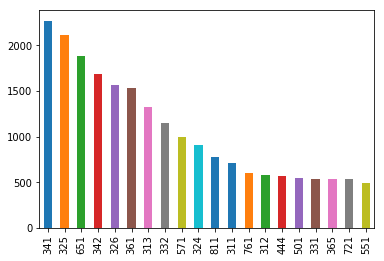

In [86]:
# checking to see if there is a fair amount of equipment in each SFI
equip['SFI'].value_counts()[:20].plot(kind='bar');

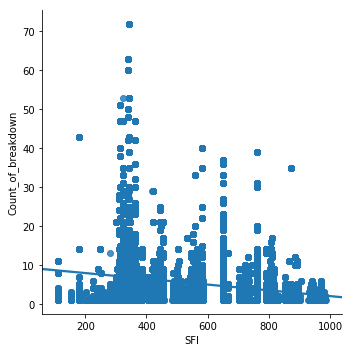

In [87]:
sns.lmplot(x='SFI', y='Count_of_breakdown', data=equip)


In [88]:
#Regrouping my SFI

equip['SFI_Str'] = equip['SFI'].astype(str).str[0]



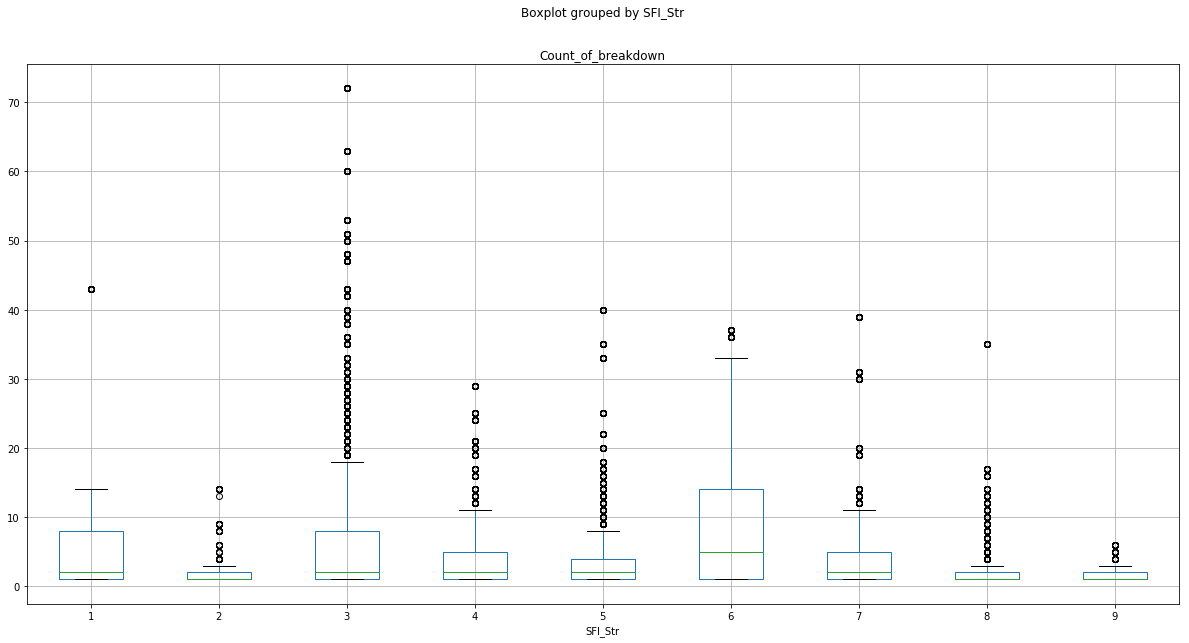

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))
#equip.boxplot(['SFI'], 'Count_of_breakdown', ax);

equip.boxplot(['Count_of_breakdown'], 'SFI_Str', ax);

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">I was right!</h4>
  <p>SFI 3 has a higher rate of breakdown due to the type of equipment in that classification - Drilling equipment. There are also a lot of outliners on SFI 3. It will be good to look at this group of equipment and find out why they are breaking down more often. SFI 6 is another area that I can investigate further
</div>

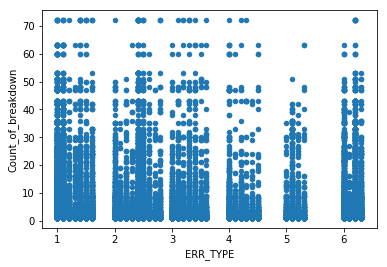

In [17]:
#What kind of breakdowns?
equip.plot(kind='scatter', x='ERR_TYPE', y='Count_of_breakdown');


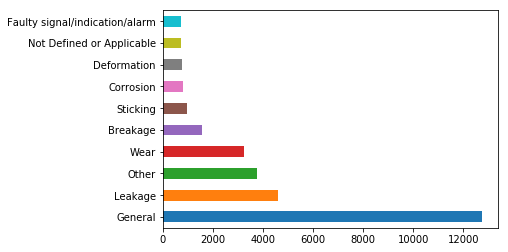

In [33]:
equip['ERROR_TYPE'].value_counts()[:10].plot(kind='barh');

In [19]:
lr = LinearRegression()

feature_cols = ['SFI']
X_feat = X[feature_cols]

lr.fit(X_feat,y)

print("The intercept is: ", lr.intercept_)
print("The coefficient is ", lr.coef_)


The intercept is:  [9.40228156]
The coefficient is  [[-0.00740568]]


In [20]:
y_pred = lr.predict(X_feat)

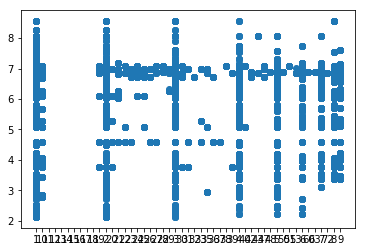

In [21]:
plt.scatter(y, y_pred);

In [22]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y, y_pred)))

RMSE:  9.464786963633381


In [23]:
# create train and test 70% and 30% split
from sklearn.cross_validation import train_test_split
from sklearn import metrics

train_x, test_x, train_y, test_y = train_test_split(X_feat,y, test_size = 0.3, random_state=1)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

lr.fit(train_x, train_y)

(28145, 1)
(12063, 1)
(28145, 1)
(12063, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_predict = lr.predict(test_x)
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_predict)))

RMSE: 9.516133562833797


In [25]:
kf = KFold(n_splits=5)

for train, test in kf.split(X_feat):
    #print("TRAIN:", train, "TEST:", test)
    X_train, X_test = np.array(X_feat)[train], np.array(X_feat)[test]
    y_train, y_test = np.array(y)[train], np.array(y)[test]

lr.fit(X_train, y_train)
predict = lr.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

RMSE: 6.760081780612289


<div class="alert alert-success" role="alert">
  <p> 4. Changing to logistic regression and classifying if an equipment in a certain SFI will breakdown or not. 
</div>

In [26]:
y.describe()

,Count_of_breakdown
count,40208.000000
mean,5.814017
std,9.573491
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,72.000000


In [27]:
# Mean of breakdowns is 5.8

# Anything above that, i will just mark it as 1 where it has a higher chance to breakdown, the rest = 0 
#where it has a lesser chance of breakdown

def addBreakdownProb(row):
    if row['Count_of_breakdown'] >= 5.8:
        val = 1
    else:
        val = 0
    return val

# Adding new column 'Breakdown_prob'

equip['Breakdown_prob'] = equip.apply(addBreakdownProb, axis=1)

In [28]:
equip.head()

,REG_DATE,ERR_DESCR,WORK_DESCR_LO,PERFORMED_ACTION_LO,RIG,AGE_OF_RIG,PERFORMED_ACTION_ID,PERFORMED_ACTION,ERR_TYPE,ERROR_TYPE,MCH_CODE,MCH_CODE_DESCRIPTION,SFI,Count_of_breakdown,Breakdown_prob
0,13-Jul-15,Assistance to Fanø crane service.,na,Assist Fanø crane service.,J105,5361.0,12.0,Other,6.2,Other,11002484,CRANE NO.2; FWD;STBD,361,42,1
1,07-Jun-15,replace cables and plugs for test equip in mudlab,replace cables and plugs for test equip in mudlab,cables damaged,J105,5361.0,1.0,Replace,4.3,No power/voltage,12010582,THIRD PARTY EQUIPMENT - GROUP,180,43,1
2,08-Jun-15,Modifi bit braker,Modifi bit braker to fit new bit from Conoco,Modifi bit breaker to fit new bit from Conoco,J105,5361.0,1.0,Replace,1.0,General,10001235,"BIT SUB; 7 5/8"" REG BOX X BOX",353,1,0
3,10-Nov-15,Assist Archer with electrical connections etc.,Hook up test repair,Assist 3rd party,J105,5361.0,7.0,Service,6.0,General,12010588,OFFICE CONTAINER,180,1,0
4,09-Jan-16,Hook up MWD container,Hook up MWD container,Hook up MWD container,J105,5361.0,12.0,Other,6.0,General,12010582,THIRD PARTY EQUIPMENT - GROUP,180,43,1


In [29]:
logreg = LogisticRegression()


feature_column = ['SFI']
X = equip[feature_column]
y = equip.Breakdown_prob


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#logreg.fit(X,y)
#y_pred = logreg.predict(X)

Accuracy of logistic regression classifier on test set: 0.75


In [30]:
kfold = KFold(n_splits=10, random_state=7)
crossv = LogisticRegression()

results = cross_val_score(crossv, X_train, y_train, cv=kfold, scoring='accuracy')
print("Average accuracy of 10-fold cross validation: %.3f" %(results.mean()))

Average accuracy of 10-fold cross validation: 0.749


<div class="alert alert-success" role="alert">
  <p> Conclusion: Average accuracy is very close to the Logistic Regression model accuracy, so the model generalizes well
</div>